In [1]:
# Foloww Tutorial

In [ ]:
import shutil
import glob
import os
import subprocess

from crds import bestrefs


import matplotlib.pyplot as plt
from astropy.io import fits

from astroquery.mast import Observations
from stwcs.updatewcs import updatewcs
from drizzlepac import tweakreg, astrodrizzle, photeq
from stsci.skypac import skymatch

# ONLY needed for the simulation section:
import numpy as np
from stwcs.wcsutil import HSTWCS
from drizzlepac.wfpc2Data import WFPC2_GAINS

%matplotlib inline

## Note

Reminder: the reference file pointer “uref” should be set in 
the working C-shell window before starting PyRAF or Python; i.e.,

setenv uref /Users/jane/reffiles/
since AstroDrizzle or TweakReg need to access the appropriate reference files when 
updatewcs=True


In [50]:
filelist = glob.glob('data/*.fits')
filelistiraf = ','.join(x for x in filelist)
print(filelistiraf)
#datafile = 'data/u9710103m_c0m.fits'

data/u9710203m_c0m.fits,data/u9710103m_c0m.fits


In [51]:
os.environ['CRDS_SERVER_URL'] = 'https://hst-crds.stsci.edu'
os.environ['CRDS_PATH'] = os.path.abspath(os.path.join('.', 'reference_files'))

subprocess.check_output('crds bestrefs --files data/*c0m.fits --sync-references=1 --update-bestrefs', shell=True)

#
os.environ['uref'] = os.path.abspath(os.path.join('.', 'reference_files', 'references', 'hst', 'wfpc2')) + os.path.sep

#  Align



Setting up logfile :  tweakreg.log
TweakReg Version 1.4.7(18-April-2018) started at: 14:10:49.627 (03/05/2019) 

Version Information
--------------------
Python Version [GCC 7.3.0]
2.7.15 |Anaconda, Inc.| (default, Dec 14 2018, 19:04:19) 
numpy Version -> 1.16.3 
astropy Version -> 2.0.9 
stwcs Version -> 1.3.2 

Finding shifts for: 
    /home/mmarcano/Documents/NGC6397F336W/Try/data/u9710203m_c0m.fits
    /home/mmarcano/Documents/NGC6397F336W/Try/data/u9710103m_c0m.fits

===  Source finding for image '/home/mmarcano/Documents/NGC6397F336W/Try/data/u9710203m_c0m.fits':
  #  Source finding for '/home/mmarcano/Documents/NGC6397F336W/Try/data/u9710203m_c0m.fits', EXT=('SCI', 1) started at: 14:10:49.761 (03/05/2019)
     Found 337 objects.
  #  Source finding for '/home/mmarcano/Documents/NGC6397F336W/Try/data/u9710203m_c0m.fits', EXT=('SCI', 2) started at: 14:10:49.900 (03/05/2019)
     Found 412 objects.
  #  Source finding for '/home/mmarcano/Documents/NGC6397F336W/Try/data/u9710203m_c0

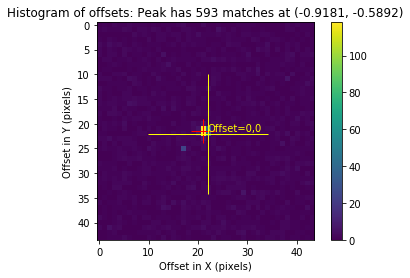

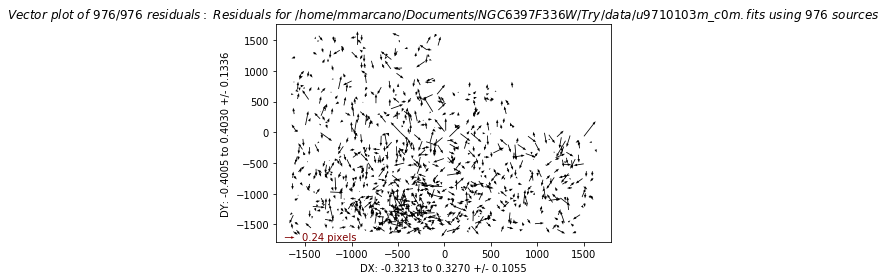

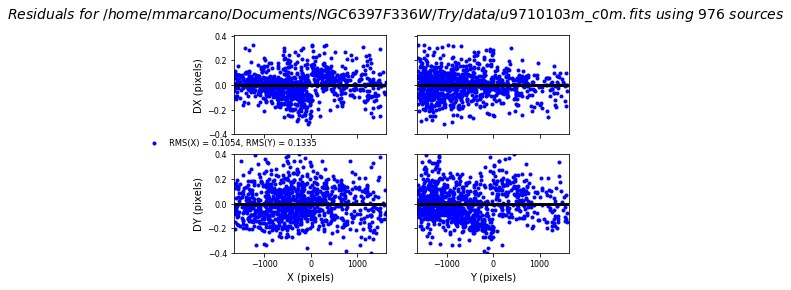

In [52]:
tweakreg.TweakReg(filelistiraf, updatehdr=True, reusename=True, interactive=False,
                  conv_width=3.0, threshold=300.0, peakmin=100, peakmax=10000)

# Catfits

In [8]:
from pyraf.iraf import tables

In [9]:
tables.catfits('data/u9710103m_c0m.fits')

EXT#  FITSNAME      FILENAME              EXTVE DIMENS       BITPI OBJECT       

0     data/u9710103 u9710103m_c0f.fits                       16                 
1       IMAGE       SCI                   1     800x800      -32                
2       IMAGE       SCI                   2     800x800      -32                
3       IMAGE       SCI                   3     800x800      -32                
4       IMAGE       SCI                   4     800x800      -32                
5       BINTABLE    WCSCORR               1     24Fx24R                         
6       IMAGE       D2IMARR               1     800x1        -32                


# Astrodrizzle

In [53]:
astrodrizzle.AstroDrizzle(filelistiraf,
                          driz_sep_fillval=99999,
                          updatewcs='True',
                          driz_sep_bits='8,1024',
                          driz_cr_snr='5.5 3.5',
                          driz_cr_scale='2.0 1.5',
                          combine_type='median',
                          driz_cr_corr= 'True',
                          final_wht_type='EXP',
                          final_wt_scl='exptime',
                          final_pixfrac=1.0,
                          final_fillval=99999,
                          final_bits='8,1024')
                          
                          


Setting up logfile :  astrodrizzle.log
AstroDrizzle Version 2.2.6 (2018-11-02 15:37:13 -0400) started at: 14:11:17.066 (03/05/2019)

==== Processing Step  Initialization  started at  14:11:17.071 (03/05/2019)
- IDCTAB: Distortion model from row 354 for chip 3 : F336W
- OFFTAB: Offset interpolated from rows 27 and 31
- IDCTAB: Distortion model from row 22 for chip 1 : F336W
- OFFTAB: Offset interpolated from rows 25 and 29
- IDCTAB: Distortion model from row 188 for chip 2 : F336W
- OFFTAB: Offset interpolated from rows 26 and 30
- IDCTAB: Distortion model from row 354 for chip 3 : F336W
- OFFTAB: Offset interpolated from rows 27 and 31
- IDCTAB: Distortion model from row 520 for chip 4 : F336W
- OFFTAB: Offset interpolated from rows 28 and 32
- IDCTAB: Distortion model from row 354 for chip 3 : F336W
- OFFTAB: Offset interpolated from rows 27 and 31
- IDCTAB: Distortion model from row 22 for chip 1 : F336W
- OFFTAB: Offset interpolated from rows 25 and 29
- IDCTAB: Distortion model fro